## Set torch.device to CUDA

In [1]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA is available. Using GPU.")
else:
    device = torch.device("cpu")
    print("CUDA is not available. Using CPU.")

CUDA is available. Using GPU.


## Download NLTK

In [2]:
import nltk
import os
CUSTOM_DIR = './nltk_data/'

nltk.data.path.append(CUSTOM_DIR)

resources = [
    ('reuters.zip', os.path.join(CUSTOM_DIR, 'corpora', 'reuters')),
    ('punkt.zip', os.path.join(CUSTOM_DIR, 'tokenizers', 'punkt')),
    ('punkt_tab.zip', os.path.join(CUSTOM_DIR, 'tokenizers', 'punkt_tab')),
    ('stopwords.zip', os.path.join(CUSTOM_DIR, 'corpora', 'stopwords')),
]

for resource, path in resources:
    try:
        nltk.data.find(resource)
    except LookupError:
        if not os.path.exists(path):
            nltk.download(resource.split('.')[0], download_dir=CUSTOM_DIR)


[nltk_data] Downloading package reuters to ./nltk_data/...
[nltk_data]   Package reuters is already up-to-date!


In [3]:
from nltk.corpus import reuters

category = "trade"
category_fileids = reuters.fileids(category)
category_docs = [reuters.raw(fileids) for fileids in category_fileids]

print(f"# of documents in category '{category}': {len(category_docs)}")
print(f"1st document:\n{category_docs[0][:500]}")

# of documents in category 'trade': 485
1st document:
ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT
  Mounting trade friction between the
  U.S. And Japan has raised fears among many of Asia's exporting
  nations that the row could inflict far-reaching economic
  damage, businessmen and officials said.
      They told Reuter correspondents in Asian capitals a U.S.
  Move against Japan might boost protectionist sentiment in the
  U.S. And lead to curbs on American imports of their products.
      But some exporters said that while the conflict wo


In [4]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    return tokens

In [5]:
preprocessed_docs = [preprocess_text(doc) for doc in category_docs]
preprocessed_docs

[['asian',
  'exporters',
  'fear',
  'damage',
  'u.s.-japan',
  'rift',
  'mounting',
  'trade',
  'friction',
  'u.s.',
  'japan',
  'raised',
  'fears',
  'among',
  'many',
  'asia',
  "'s",
  'exporting',
  'nations',
  'row',
  'could',
  'inflict',
  'far-reaching',
  'economic',
  'damage',
  'businessmen',
  'officials',
  'said',
  'told',
  'reuter',
  'correspondents',
  'asian',
  'capitals',
  'u.s.',
  'move',
  'japan',
  'might',
  'boost',
  'protectionist',
  'sentiment',
  'u.s.',
  'lead',
  'curbs',
  'american',
  'imports',
  'products',
  'exporters',
  'said',
  'conflict',
  'would',
  'hurt',
  'long-run',
  'short-term',
  'tokyo',
  "'s",
  'loss',
  'might',
  'gain',
  'u.s.',
  'said',
  'impose',
  '300',
  'mln',
  'dlrs',
  'tariffs',
  'imports',
  'japanese',
  'electronics',
  'goods',
  'april',
  '17',
  'retaliation',
  'japan',
  "'s",
  'alleged',
  'failure',
  'stick',
  'pact',
  'sell',
  'semiconductors',
  'world',
  'markets',
  'cost

In [6]:
len(preprocessed_docs)

485

In [7]:
flatten = lambda l: [item for sublist in l for item in sublist]
vocab = list(set(flatten(preprocessed_docs)))
vocab

['managers',
 '93.76',
 'deliberate',
 'stretching',
 'topple',
 'products',
 'mainly',
 'woong',
 'refuse',
 'jobless',
 '120.9',
 'discussing',
 'prevarication',
 'p.s',
 '675,000',
 'breakdown',
 'lufkin',
 'mid-may',
 'bypass',
 '3.6',
 'donation',
 'commerzbank',
 'persists',
 'entertain',
 'bid',
 '42',
 'sophisticated',
 '48.8',
 'citing',
 'moore',
 'confrontations',
 '12.2',
 'pure',
 '152.32',
 'advanced',
 'ill-advised',
 'cpi',
 '7.33',
 '20.4',
 '16.65.',
 '1.20',
 'frustration',
 '11.1',
 '104.68',
 'closely',
 'scapegoat',
 'tolerating',
 'months',
 'saskatchewan',
 'comes',
 'markka',
 '76',
 'radio',
 'substituting',
 'surpassing',
 '95',
 '771',
 'declarations',
 'places',
 'prior',
 '670,000',
 '1.74',
 'load',
 'vulnerable',
 'inspectors',
 '90.2',
 'doubtful',
 'dumped',
 'metal',
 '1.81',
 'insurers',
 'affecting',
 'immorally',
 '109',
 'requests',
 'worried',
 'recognized',
 'hardware',
 'assistance',
 'recklessly',
 'bucharest',
 'r-iowa',
 '14.6',
 'imf',
 'un

In [8]:
word2index = {w: i for i, w in enumerate(vocab)}
print(word2index)

{'managers': 0, '93.76': 1, 'deliberate': 2, 'stretching': 3, 'topple': 4, 'products': 5, 'mainly': 6, 'woong': 7, 'refuse': 8, 'jobless': 9, '120.9': 10, 'discussing': 11, 'prevarication': 12, 'p.s': 13, '675,000': 14, 'breakdown': 15, 'lufkin': 16, 'mid-may': 17, 'bypass': 18, '3.6': 19, 'donation': 20, 'commerzbank': 21, 'persists': 22, 'entertain': 23, 'bid': 24, '42': 25, 'sophisticated': 26, '48.8': 27, 'citing': 28, 'moore': 29, 'confrontations': 30, '12.2': 31, 'pure': 32, '152.32': 33, 'advanced': 34, 'ill-advised': 35, 'cpi': 36, '7.33': 37, '20.4': 38, '16.65.': 39, '1.20': 40, 'frustration': 41, '11.1': 42, '104.68': 43, 'closely': 44, 'scapegoat': 45, 'tolerating': 46, 'months': 47, 'saskatchewan': 48, 'comes': 49, 'markka': 50, '76': 51, 'radio': 52, 'substituting': 53, 'surpassing': 54, '95': 55, '771': 56, 'declarations': 57, 'places': 58, 'prior': 59, '670,000': 60, '1.74': 61, 'load': 62, 'vulnerable': 63, 'inspectors': 64, '90.2': 65, 'doubtful': 66, 'dumped': 67, 'm

In [9]:
voc_size = len(vocab)
print(voc_size)

8163


In [10]:
index2word = {v:k for k, v in word2index.items()} 
index2word

{0: 'managers',
 1: '93.76',
 2: 'deliberate',
 3: 'stretching',
 4: 'topple',
 5: 'products',
 6: 'mainly',
 7: 'woong',
 8: 'refuse',
 9: 'jobless',
 10: '120.9',
 11: 'discussing',
 12: 'prevarication',
 13: 'p.s',
 14: '675,000',
 15: 'breakdown',
 16: 'lufkin',
 17: 'mid-may',
 18: 'bypass',
 19: '3.6',
 20: 'donation',
 21: 'commerzbank',
 22: 'persists',
 23: 'entertain',
 24: 'bid',
 25: '42',
 26: 'sophisticated',
 27: '48.8',
 28: 'citing',
 29: 'moore',
 30: 'confrontations',
 31: '12.2',
 32: 'pure',
 33: '152.32',
 34: 'advanced',
 35: 'ill-advised',
 36: 'cpi',
 37: '7.33',
 38: '20.4',
 39: '16.65.',
 40: '1.20',
 41: 'frustration',
 42: '11.1',
 43: '104.68',
 44: 'closely',
 45: 'scapegoat',
 46: 'tolerating',
 47: 'months',
 48: 'saskatchewan',
 49: 'comes',
 50: 'markka',
 51: '76',
 52: 'radio',
 53: 'substituting',
 54: 'surpassing',
 55: '95',
 56: '771',
 57: 'declarations',
 58: 'places',
 59: 'prior',
 60: '670,000',
 61: '1.74',
 62: 'load',
 63: 'vulnerable',

## Prepare train data

In [11]:
total_count = 0
for count, value in enumerate(preprocessed_docs):
    total_count += count
    print(value)

print(total_count)

['asian', 'exporters', 'fear', 'damage', 'u.s.-japan', 'rift', 'mounting', 'trade', 'friction', 'u.s.', 'japan', 'raised', 'fears', 'among', 'many', 'asia', "'s", 'exporting', 'nations', 'row', 'could', 'inflict', 'far-reaching', 'economic', 'damage', 'businessmen', 'officials', 'said', 'told', 'reuter', 'correspondents', 'asian', 'capitals', 'u.s.', 'move', 'japan', 'might', 'boost', 'protectionist', 'sentiment', 'u.s.', 'lead', 'curbs', 'american', 'imports', 'products', 'exporters', 'said', 'conflict', 'would', 'hurt', 'long-run', 'short-term', 'tokyo', "'s", 'loss', 'might', 'gain', 'u.s.', 'said', 'impose', '300', 'mln', 'dlrs', 'tariffs', 'imports', 'japanese', 'electronics', 'goods', 'april', '17', 'retaliation', 'japan', "'s", 'alleged', 'failure', 'stick', 'pact', 'sell', 'semiconductors', 'world', 'markets', 'cost', 'unofficial', 'japanese', 'estimates', 'put', 'impact', 'tariffs', '10', 'billion', 'dlrs', 'spokesmen', 'major', 'electronics', 'firms', 'said', 'would', 'virtua

In [12]:
import numpy as np

def random_batch(batch_size, word_sequence, window_size=2):
    skip_grams = []
    # get skip-grams with the specified window size
    for sent in word_sequence:
        for i in range(len(sent)):
            target = word2index[sent[i]]
            
            # get the context words within the window size
            start = max(0, i - window_size)
            end = min(len(sent), i + window_size + 1)
            context = [word2index[sent[j]] for j in range(start, end) if j != i]
            for w in context:
                skip_grams.append([target, w])
    
    # print("Skipgrams:")
    # for skip in skip_grams:
    #     print(skip)
    
    # select random skip-grams for the batch
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(skip_grams)), batch_size, replace=False)
        
    for i in random_index:
        random_inputs.append([skip_grams[i][0]])  # target word
        random_labels.append([skip_grams[i][1]])  # context word
            
    return np.array(random_inputs), np.array(random_labels)



### Testing the method

In [13]:
batch_size = 2
input_batch, target_batch = random_batch(batch_size=batch_size, word_sequence=preprocessed_docs, window_size=2)

In [14]:
target_batch

array([[7498],
       [5075]])

In [15]:
input_batch

array([[2512],
       [4861]])

## Negative Sampling

In [16]:
from collections import Counter

word_count = Counter(flatten(preprocessed_docs))
num_total_words = sum([c for w, c in word_count.items()])

In [17]:
word_count[','], word_count["."]

(0, 0)

In [18]:
num_total_words

78611

In [19]:
Z = 0.001
unigram_table = []

for vo in vocab:
    unigram_table.extend([vo] * int(((word_count[vo] / num_total_words) ** 0.75) / Z))

In [20]:
Counter(unigram_table)

Counter({'said': 67,
         'trade': 64,
         'u.s.': 46,
         'billion': 40,
         "'s": 38,
         '``': 37,
         "''": 36,
         'japan': 31,
         'dlrs': 28,
         'would': 26,
         'year': 25,
         'pct': 23,
         'mln': 22,
         'deficit': 22,
         'surplus': 20,
         'exports': 19,
         'last': 19,
         'japanese': 19,
         'imports': 17,
         'foreign': 16,
         'countries': 16,
         'ec': 15,
         'states': 14,
         'government': 14,
         'february': 14,
         'united': 13,
         'officials': 13,
         'economic': 13,
         'january': 13,
         'market': 13,
         'also': 13,
         'told': 13,
         'world': 12,
         'tariffs': 12,
         'gatt': 12,
         'new': 12,
         'agreement': 12,
         'two': 11,
         '1986': 11,
         'goods': 11,
         'dollar': 11,
         'reagan': 11,
         'current': 10,
         'washington': 10,
       

In [21]:
import random
import torch

def prepare_sequence(seq, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

def negative_sampling(targets, unigram_table, k):
    batch_size = targets.size(0)
    neg_samples = []
    for i in range(batch_size):
        nsample = []
        target_index = targets[i].item()
        while len(nsample) < k: # num of sampling
            neg = random.choice(unigram_table)
            if word2index[neg] == target_index:
                continue
            nsample.append(neg)
        neg_samples.append(prepare_sequence(nsample, word2index).view(1, -1))
    return torch.cat(neg_samples)

### Testing negative sampling

In [22]:
input_batch  = torch.Tensor(input_batch)
target_batch = torch.LongTensor(target_batch)

In [23]:
input_batch.shape, target_batch.shape

(torch.Size([2, 1]), torch.Size([2, 1]))

In [24]:
target_batch

tensor([[7498],
        [5075]])

## Model

### Skipgram

In [25]:
from torch import nn

class SkipgramNegSampling(nn.Module):
    
    def __init__(self, vocab_size, emb_size):
        super(SkipgramNegSampling, self).__init__()
        self.embedding_v = nn.Embedding(vocab_size, emb_size) # center embedding
        self.embedding_u = nn.Embedding(vocab_size, emb_size) # out embedding
        self.logsigmoid = nn.LogSigmoid()
                    
    def forward(self, center_words, target_words, negative_words):
        center_embeds = self.embedding_v(center_words) # [batch_size, 1, emb_size]
        target_embeds = self.embedding_u(target_words) # [batch_size, window_size, emb_size]
        neg_embeds    = -self.embedding_u(negative_words) # [batch_size, window_size * num_neg, emb_size]
        
        positive_score = target_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, window_size]
        
        negative_score = neg_embeds.bmm(center_embeds.transpose(1, 2))
        #[batch_size, k, emb_size] @ [batch_size, emb_size, 1] = [batch_size, k, 1]
        
        loss = self.logsigmoid(positive_score) + torch.sum(self.logsigmoid(negative_score), 1)
                
        return -torch.mean(loss)
    
    def prediction(self, inputs):
        embeds = self.embedding_v(inputs)
        
        return embeds

# Training

In [26]:
from torch import optim

batch_size     = 512 # mini-batch size
embedding_size = 2 #so we can later plot
model          = SkipgramNegSampling(voc_size, embedding_size)
num_neg        = 10 # num of negative sampling

optimizer = optim.Adam(model.parameters(), lr=0.001)

In [27]:
# def epoch_time(start_time, end_time):
#     elapsed_time = end_time - start_time
#     elapsed_mins = int(elapsed_time / 60)
#     elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
#     return elapsed_mins, elapsed_secs

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time % 60)
    elapsed_millis = int((elapsed_time - int(elapsed_time)) * 1000)  # Extract milliseconds
    return elapsed_mins, elapsed_secs, elapsed_millis

In [28]:
model = model.to(device=device)

In [29]:
import time

total_training_time = 0
# Training
num_epochs = 2000
for epoch in range(num_epochs):
    
    start = time.time()
    
    input_batch, target_batch = random_batch(batch_size, preprocessed_docs, window_size=2)
    
    #input_batch: [batch_size, 1]
    input_batch = torch.LongTensor(input_batch).to(device=device)
    
    #target_batch: [batch_size, 1]
    target_batch = torch.LongTensor(target_batch).to(device=device)

    #negs_batch:   [batch_size, num_neg]
    negs_batch = negative_sampling(target_batch, unigram_table, num_neg).to(device=device)
    
    optimizer.zero_grad()
        
    loss = model(input_batch, target_batch, negs_batch)
    
    
    
    loss.backward()
    optimizer.step()

    end = time.time()
    epoch_mins, epoch_secs, epoch_millis = epoch_time(start, end)
    total_training_time += (end - start)


    if (epoch + 1) % 100 == 0:
        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s {epoch_millis}ms")

total_mins, total_secs, total_millis = epoch_time(0, total_training_time)
print(f"Total training time: {total_mins}m {total_secs}s {total_millis}ms")

Epoch: 100 | cost: 9.357941 | time: 0m 0s 414ms
Epoch: 200 | cost: 8.970984 | time: 0m 0s 482ms
Epoch: 300 | cost: 8.958160 | time: 0m 0s 484ms
Epoch: 400 | cost: 8.682599 | time: 0m 0s 396ms
Epoch: 500 | cost: 8.578339 | time: 0m 0s 504ms
Epoch: 600 | cost: 8.517206 | time: 0m 0s 391ms
Epoch: 700 | cost: 8.297796 | time: 0m 0s 492ms
Epoch: 800 | cost: 8.322064 | time: 0m 0s 488ms
Epoch: 900 | cost: 8.315296 | time: 0m 0s 402ms
Epoch: 1000 | cost: 8.147488 | time: 0m 0s 526ms
Epoch: 1100 | cost: 8.124233 | time: 0m 0s 412ms
Epoch: 1200 | cost: 8.048967 | time: 0m 0s 412ms
Epoch: 1300 | cost: 7.948369 | time: 0m 0s 421ms
Epoch: 1400 | cost: 7.851759 | time: 0m 0s 406ms
Epoch: 1500 | cost: 7.737219 | time: 0m 0s 405ms
Epoch: 1600 | cost: 7.656116 | time: 0m 0s 498ms
Epoch: 1700 | cost: 7.549522 | time: 0m 0s 390ms
Epoch: 1800 | cost: 7.591581 | time: 0m 0s 513ms
Epoch: 1900 | cost: 7.386629 | time: 0m 0s 422ms
Epoch: 2000 | cost: 7.270208 | time: 0m 0s 398ms
Total training time: 15m 3s 8

## Plotting the embeddings

In [42]:
vocab[:10]

['managers',
 '93.76',
 'deliberate',
 'stretching',
 'topple',
 'products',
 'mainly',
 'woong',
 'refuse',
 'jobless']

In [31]:
word = vocab[0]

In [32]:
id = word2index[word]
id

0

In [33]:
id_tensor = torch.LongTensor([id]).to(device=device)
id_tensor

tensor([0], device='cuda:0')

In [34]:
#get the embedding by averaging
v_embed = model.embedding_v(id_tensor)
u_embed = model.embedding_u(id_tensor)

v_embed, u_embed

(tensor([[-0.7236, -1.8384]], device='cuda:0', grad_fn=<EmbeddingBackward0>),
 tensor([[-0.5137,  0.3212]], device='cuda:0', grad_fn=<EmbeddingBackward0>))

In [35]:
word_embed = (v_embed + u_embed) / 2
word_embed[0][1]

tensor(-0.7586, device='cuda:0', grad_fn=<SelectBackward0>)

In [36]:
def get_embed(word):
    id_tensor = torch.LongTensor([word2index[word]]).to(device=device)
    v_embed = model.embedding_v(id_tensor)
    u_embed = model.embedding_u(id_tensor) 
    word_embed = (v_embed + u_embed) / 2 
    x, y = word_embed[0][0].item(), word_embed[0][1].item()

    return x, y

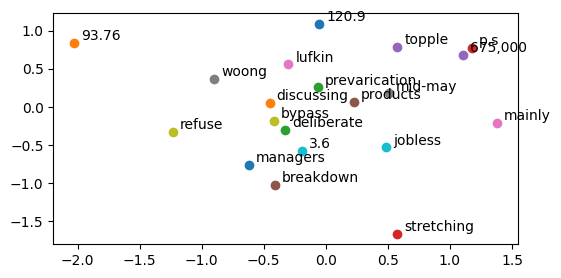

In [37]:
from matplotlib import pyplot as plt

plt.figure(figsize=(6,3))
for i, word in enumerate(vocab[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

In [ ]:
torch.save(model.state_dict(), "models/word2vec_negativesampling.pth")

## Cosine similarity

In [39]:
tax = get_embed('tax')
money = get_embed('money')
billion = get_embed('billion')
million = get_embed('million')

canada = get_embed('canada')
thai = get_embed('thai')
japan = get_embed('japan')

In [40]:
from numpy import dot
from numpy.linalg import norm


def cos_sim(a, b):
    cos_sim = dot(a, b) / (norm(a) * norm(b))
    return cos_sim


print(f'tax vs money: {cos_sim(tax, money)}')
print(f'tax vs billion: {cos_sim(tax, billion)}')
print(f'tax vs million: {cos_sim(tax, million)}')
print(f'money vs billion: {cos_sim(money, billion)}')
print(f'money vs million: {cos_sim(money, million)}')
print(f'billion vs million: {cos_sim(billion, million)}')

print(f'canada vs thai: {cos_sim(canada, thai)}')
print(f'canada vs japan: {cos_sim(canada, japan)}')
print(f'thai vs japan: {cos_sim(thai, japan)}')

tax vs money: -0.015888137936660076
tax vs billion: 0.966166878262742
tax vs million: 0.9731281979465963
money vs billion: 0.24253459716230896
money vs million: 0.2147737414631249
billion vs million: 0.9995934052391191
canada vs thai: -0.3604500814423447
canada vs japan: 0.868343985333394
thai vs japan: 0.1496284252888744


In [41]:
#scipy version
from scipy import spatial

def cos_sim(a, b):
    cos_sim = 1 - spatial.distance.cosine(a, b)  #distance = 1 - similarlity, because scipy only gives distance
    return cos_sim


print(f'tax vs money: {cos_sim(tax, money)}')
print(f'tax vs billion: {cos_sim(tax, billion)}')
print(f'tax vs million: {cos_sim(tax, million)}')
print(f'money vs billion: {cos_sim(money, billion)}')
print(f'money vs million: {cos_sim(money, million)}')
print(f'billion vs million: {cos_sim(billion, million)}')

print(f'canada vs thai: {cos_sim(canada, thai)}')
print(f'canada vs japan: {cos_sim(canada, japan)}')
print(f'thai vs japan: {cos_sim(thai, japan)}')

tax vs money: -0.015888137936659996
tax vs billion: 0.9661668782627422
tax vs million: 0.9731281979465962
money vs billion: 0.24253459716230896
money vs million: 0.2147737414631249
billion vs million: 0.9995934052391191
canada vs thai: -0.3604500814423446
canada vs japan: 0.868343985333394
thai vs japan: 0.14962842528887443
